In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

2021-11-17 21:19:25.859040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 21:19:25.859063: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
ds, info = tfds.load(
    "iris", 
    split="train", 
    with_info=True,
)

2021-11-17 21:19:28.074738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-17 21:19:28.074761: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-17 21:19:28.074779: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (calcifer-Inspiron-7370): /proc/driver/nvidia/version does not exist
2021-11-17 21:19:28.075034: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
info

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='/home/calcifer/tensorflow_datasets/iris/2.0.0',
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examp

In [4]:
features = np.stack([x['features'] for x in ds.as_numpy_iterator()])
labels = np.stack([x['label'] for x in ds.as_numpy_iterator()])

In [22]:
# Standardize the data.
mean = np.mean(features)
stddev = np.std(features)
features_std = (features - mean) / stddev

labels_ohc = to_categorical(labels, num_classes=3)

In [41]:
model = Sequential([
    Dense(
        units=6, 
        activation="tanh", 
        bias_initializer="zeros", 
        kernel_initializer="he_normal",
    ),
    Dense(
        units=3, 
        activation="softmax", 
        bias_initializer="zeros", 
        kernel_initializer="glorot_uniform",
    ),
])

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ["accuracy"]

In [43]:
model.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy",
    metrics=metrics
)

In [44]:
BATCH_SIZE = 10
HIDDEN_SIZE = 10
EPOCHS=20

In [45]:
model.fit(
    features_std, 
    labels_ohc, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    verbose=2
)

Epoch 1/20
15/15 - 0s - loss: 1.2835 - accuracy: 0.3333 - 276ms/epoch - 18ms/step
Epoch 2/20
15/15 - 0s - loss: 1.0262 - accuracy: 0.5733 - 10ms/epoch - 642us/step
Epoch 3/20
15/15 - 0s - loss: 0.8483 - accuracy: 0.7333 - 12ms/epoch - 789us/step
Epoch 4/20
15/15 - 0s - loss: 0.6860 - accuracy: 0.7733 - 15ms/epoch - 1ms/step
Epoch 5/20
15/15 - 0s - loss: 0.5704 - accuracy: 0.8400 - 12ms/epoch - 822us/step
Epoch 6/20
15/15 - 0s - loss: 0.4931 - accuracy: 0.8667 - 14ms/epoch - 918us/step
Epoch 7/20
15/15 - 0s - loss: 0.4385 - accuracy: 0.9000 - 13ms/epoch - 899us/step
Epoch 8/20
15/15 - 0s - loss: 0.3866 - accuracy: 0.9000 - 13ms/epoch - 859us/step
Epoch 9/20
15/15 - 0s - loss: 0.3411 - accuracy: 0.9400 - 13ms/epoch - 864us/step
Epoch 10/20
15/15 - 0s - loss: 0.2974 - accuracy: 0.9467 - 14ms/epoch - 934us/step
Epoch 11/20
15/15 - 0s - loss: 0.2642 - accuracy: 0.9600 - 15ms/epoch - 1ms/step
Epoch 12/20
15/15 - 0s - loss: 0.2328 - accuracy: 0.9533 - 14ms/epoch - 904us/step
Epoch 13/20
15/15

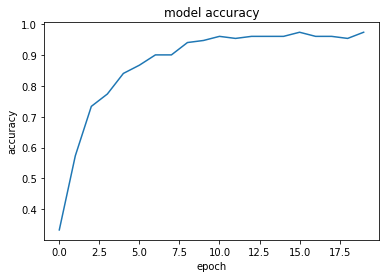

Max accuracy: 97.3%


In [49]:
# summarize history for accuracy
accuracy = model.history.history['accuracy']
plt.plot(accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
print("Max accuracy: {:.1%}".format(np.max(accuracy)))

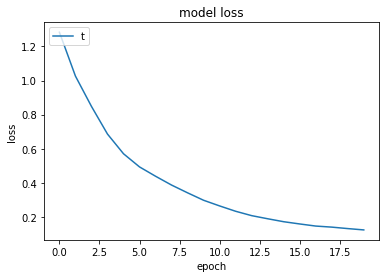

Min Loss: 0.12


In [48]:
loss = model.history.history['loss']
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='upper left')
plt.show()
print("Min Loss: {:.2f}".format(np.min(loss)))